<a href="https://colab.research.google.com/github/skykmar02/Zoomcamp-HWs-self/blob/main/W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
!wget $data -O data-week-3.csv

--2025-12-12 07:33:37--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.03s   

2025-12-12 07:33:37 (32.5 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [ ]:
df = pd.read_csv('data-week-3.csv')


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [ ]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [ ]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [ ]:
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
df.totalcharges

,totalcharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [ ]:
pd.to_numeric(df.totalcharges, errors = 'coerce')

,totalcharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [ ]:
df.totalcharges = df.totalcharges.fillna(0)

In [ ]:
df.totalcharges.isnull().sum()

np.int64(0)

In [ ]:
df.churn = (df.churn == 'yes').astype(int)

# Settinng Up the Validation Framework

Perform the train/validation/test split with Scikit-Learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)


In [ ]:
len(df_full_train), len(df_test)

(5634, 1409)

In [ ]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# 3.4 EDA exploratory data analysis

check missing values  
look at the target variable (chur)  
look at the numercial and categorical variables

In [ ]:
df_full_train.churn.value_counts()

,count
churn,
0,4113
1,1521


In [ ]:
df_full_train.churn.value_counts(normalize = True)

,proportion
churn,
0,0.730032
1,0.269968


In [ ]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [ ]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [ ]:
df_full_train.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [ ]:
df_full_train[categorical].nunique()

,0
gender,2
seniorcitizen,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3


# 3.5 Feature importance: churt rate and risk ratio

Fetaure imp analysis (part of EDA)- identifying which feature affects our traget variable.
- churn rate
- risk rate
- mutual info- later

### churn rate

In [ ]:
df_full_train[df_full_train.gender == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [ ]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()

In [ ]:
df_full_train[df_full_train.gender == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [ ]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [ ]:
churn_female , churn_male

(np.float64(0.27682403433476394), np.float64(0.2632135306553911))

In [ ]:
df_full_train.partner.value_counts()

,count
partner,
no,2932
yes,2702


In [ ]:
df_full_train[df_full_train.partner == 'yes'].churn.mean()

np.float64(0.20503330866025166)

In [ ]:
df_full_train[df_full_train.partner == 'no'].churn.mean()

np.float64(0.3298090040927694)

In [ ]:
churn_partner = df_full_train[df_full_train.partner =='yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [ ]:
global_churn_rate-churn_partner

np.float64(0.06493474245795922)

In [ ]:
churn_no_partner = df_full_train[df_full_train.partner =='no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [ ]:
global_churn_rate-churn_no_partner

np.float64(-0.05984095297455855)

In [ ]:
global_churn_rate-churn_female

np.float64(-0.006855983216553063)

In [ ]:
global_churn_rate-churn_male

np.float64(0.006754520462819769)

## feature importance
- difference  
  global-group
- risk ratio  
  group/global  
  both give same information, but risk ratio give in relative term
  

### Risk ratio

In [ ]:
churn_no_partner/global_churn_rate

np.float64(1.2216593879412643)

In [ ]:
churn_partner/global_churn_rate

np.float64(0.7594724924338315)

In [ ]:
df_full_train.groupby('gender').churn.mean()

,churn
gender,
female,0.276824
male,0.263214


In [ ]:
from IPython.display import display

In [ ]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [ ]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature Imporance: Mutual information


In [ ]:
df_train.churn

,churn
0,0
1,0
2,1
3,0
4,0
...,...
4220,0
4221,0
4222,1
4223,0


In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

np.float64(0.0983203874041556)

In [ ]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

np.float64(0.0001174846211139946)

In [ ]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [ ]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [ ]:
df_full_train[categorical].apply(mutual_info_churn_score)

,0
gender,0.000117
seniorcitizen,0.009410
partner,0.009968
dependents,0.012346
phoneservice,0.000229
multiplelines,0.000857
internetservice,0.055868
onlinesecurity,0.063085
onlinebackup,0.046923
deviceprotection,0.043453


In [ ]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

,0
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


# 3.7 Feature Importance: Coefficients


- correlation coefficient



In [ ]:
df_full_train[numerical].corrwith(df_full_train.churn)
# TENURE and TOTALCHARGES are negative because correlation is negative? higher tenure → lower chance of churn.
#totalcharges ↑ → customer is old → less churn → negative correlation


,0
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [ ]:
df_full_train[df_full_train.tenure<=2].churn

,churn
11,0
37,1
54,1
63,1
66,0
...,...
5607,0
5609,0
5612,1
5614,1


In [ ]:
df_full_train[df_full_train.tenure<=2].churn.mean()

np.float64(0.5953420669577875)

In [ ]:
df_full_train[(df_full_train.tenure>2) & (df_full_train.tenure <=12)].churn.mean()

np.float64(0.3994413407821229)

In [ ]:
df_full_train[df_full_train.tenure>12].churn.mean()

np.float64(0.17634908339788277)

In [ ]:
df_full_train[df_full_train.monthlycharges<=20].churn.mean()

np.float64(0.08795411089866156)

In [ ]:
df_full_train[(df_full_train.monthlycharges>20) & (df_full_train.monthlycharges<50)].churn.mean()

np.float64(0.1836890243902439)

In [ ]:
df_full_train[(df_full_train.monthlycharges>50)].churn.mean()

np.float64(0.32499341585462205)

# 3.8 One hot encodinng

In [ ]:
#from sklearn.feature_extraction import DictVectorizer

In [ ]:
#df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient = 'records')

[{'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 10},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 5},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 6}]

In [ ]:
#train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [ ]:
#train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [ ]:
#dv = DictVectorizer(sparse = False)

In [ ]:
#dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [ ]:
#dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
#dv.transform(train_dicts[:5])

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.52500e+01, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.0

Lets clean the one hot encodinng process again and do it bett:

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer(sparse = False)

In [ ]:
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

In [ ]:
X_train = dv.fit_transform(train_dicts)

In [ ]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [ ]:
X_val = dv.transform(val_dicts)

# Logistic Regression

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
np.linspace(-7, 7, 51)

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [ ]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

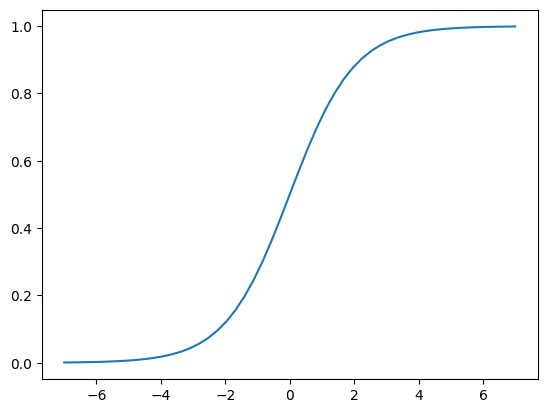

In [ ]:
plt.plot(z, sigmoid(z))

In [ ]:
def linear_regression(xi):
  reuslt = w0

  for j in range(len(w)):
    result = result + xi[j]*w[j]

  return result

In [ ]:
def logistic_regression(xi):
  score = w0

  for j in range(len(w)):
    score = score + xi[j]*w[j]

  result = sigmoid(score)
  return result

# Trainig Logistic Regression with Sckit Learn

Train a model with Scikit Learn  
Apply it to the validation dataset  
calculate the accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model.intercept_[0]

np.float64(-0.045323382519725265)

In [ ]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [ ]:
model.predict_proba(X_train) #soft predict, two colums: first one give probability of being zero.
#2nd one gives probability of becoming 1. So

array([[0.92737411, 0.07262589],
       [0.32428383, 0.67571617],
       [0.36935502, 0.63064498],
       ...,
       [0.48795432, 0.51204568],
       [0.97453476, 0.02546524],
       [0.30652661, 0.69347339]])

In [ ]:
model.predict_proba(X_train)[:, 1]

array([0.07262589, 0.67571617, 0.63064498, ..., 0.51204568, 0.02546524,
       0.69347339])

In [ ]:
model.predict(X_train) #hard prediction

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_p = model.predict_proba(X_val)[:, 1]red

In [ ]:
churn_decision = y_pred>=0.5

In [ ]:
churn_decision

array([False, False, False, ..., False,  True,  True])

In [ ]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20,1
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,...,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65,1
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65,1
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15,1
24,2612-ranwt,female,0,no,no,12,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),100.15,1164.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20,1
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70,1
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65,1
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30,1


In [ ]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
y_val == churn_decision

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val


In [ ]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [ ]:
df_pred

,probability,prediction,actual,correct
0,0.006624,0,0,True
1,0.204823,0,0,True
2,0.217818,0,0,True
3,0.563750,1,1,True
4,0.218675,0,0,True
...,...,...,...,...
1404,0.291307,0,0,True
1405,0.041390,0,1,False
1406,0.151496,0,0,True
1407,0.788479,1,1,True


In [ ]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

# Model Interpretation

Look at the coefficients  
train a smaller model with fewer features

In [ ]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [ ]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.685),
 'contract=one_year': np.float64(0.039),
 'contract=two_year': np.float64(-0.682),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.162),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.084),
 'onlinesecurity=no': np.float64(0.285),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [ ]:
small = ['contract', 'tenure', 'monthlycharges']

In [ ]:
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [ ]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [ ]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [ ]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [ ]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [ ]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [ ]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [ ]:
(-2.47 + (0*0.97) - 0*0.025 -1*.949 +(30*.027) -24*.036)

-3.473

In [ ]:
sigmoid(_) #we are taking random values for contract, monthlycharges and tenure

np.float64(0.030090303318277657)

# Using this model

In [ ]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [ ]:
dv = DictVectorizer(sparse = False)

In [ ]:
X_full_train = dv.fit_transform(dicts_full_train)

In [ ]:
y_full_train = df_full_train.churn.values

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=10000)

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
model.predict_proba(X_test)[:, 1]

array([0.06770008, 0.09812139, 0.33465668, ..., 0.00510837, 0.20467152,
       0.63757047])

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision==y_test).mean()

np.float64(0.8105039034776437)

In [ ]:
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [ ]:
customer = dicts_test[10]

In [ ]:
dv.transform([customer])

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [ ]:
X_small = dv.transform([customer])

In [ ]:
X_small.shape

(1, 45)

In [ ]:
model.predict_proba(X_small)  #Elexi got 40%

array([[0.52367176, 0.47632824]])

In [ ]:
model.predict_proba(X_small)[0,1]

np.float64(0.47632824241018595)

In [ ]:
y_test[10]

np.int64(0)

In [ ]:
customer = dicts_test[-1]

In [ ]:
dv.transform([customer])

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [ ]:
X_small = dv.transform([customer])

In [ ]:
model.predict_proba(X_small)[0,1] #alexi got 59%

np.float64(0.6375704661276868)

In [ ]:
y_test[-1]

np.int64(1)